# Institución Universitaria Pascual Bravo

Curso: Reconocimeinto de patrones 2024-1

Docente: Juan Carlos Briñez de León

Tema: Reconocimiento de patrones en señales de audio

Cargue de señales de audio

In [1]:
#Conectando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(67738,) 22050
Señal original


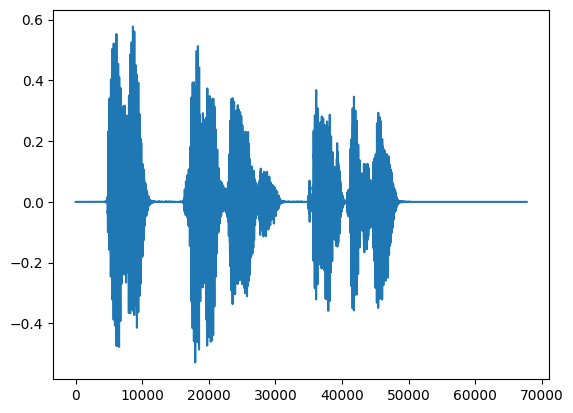

 
Señal muestreada


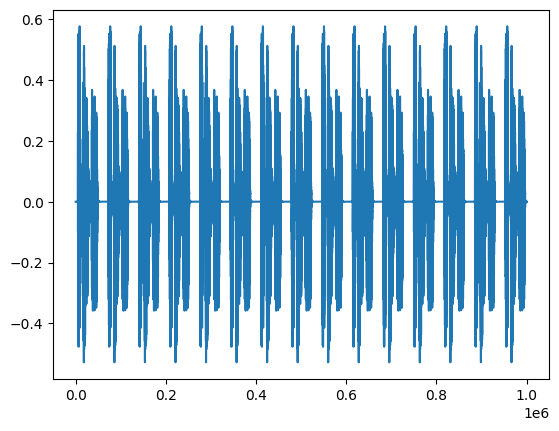

 
(1000000,)


In [2]:
#0. Entendiendo las señales de audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

ruta=r'/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 13/Audios/Adultos/Adulto_001_1.mp3'
x , sr = librosa.load(ruta)
print(x.shape, sr)
print('Señal original')
plt.plot(x)
plt.show()
print(' ')

X_New = np.resize(x, 1000000) #Muestreo
# X_New = np.resize(x, 50000) #Muestreo
print('Señal muestreada')
plt.plot(X_New)
plt.show()
print(' ')

print(X_New.shape)

In [ ]:
#Extracción de características
Varianza = np.var(X_New)
print(Varianza) #1 dato

Desviacion=np.std(X_New)
print(Desviacion) #1 dato

rms_amplitude = np.sqrt(np.mean(np.square(X_New)))
print(rms_amplitude) #1 dato

zero_crossings = np.where(np.diff(np.sign(X_New)))[0]
zcr = len(zero_crossings)
print(zcr) #1 dato

from scipy.stats import skew
skewness = skew(X_New)
print(skewness) #1 dato

Magnitud, phase = librosa.magphase(librosa.stft(X_New))

RMS_vector = librosa.feature.rms(S=Magnitud)
RMS = RMS_vector.mean()
print(RMS)

Times_vector = librosa.times_like(RMS_vector)
Times = Times_vector.mean()
print(Times)

Vector_feature=np.zeros((1,7))
Vector_feature[0,0]=RMS
Vector_feature[0,1]=Times
Vector_feature[0,2]=Varianza
Vector_feature[0,3]=rms_amplitude
Vector_feature[0,4]=Desviacion
Vector_feature[0,5]=zcr
Vector_feature[0,6]=skewness

print("")
print("Imprimiendo el vector de características")
print(Vector_feature)


0.01828479
0.13522126
0.13522127
1179
0.07336543075779173
0.07599385827580958
1.126167800453515

Imprimiendo el vector de características
[[7.59938583e-02 1.12616780e+00 1.82847902e-02 1.35221273e-01
  1.35221258e-01 1.17900000e+03 7.33654308e-02]]


In [ ]:
#1. Generando matriz de características
import numpy as np
import pandas as pd
from google.colab import output
Ruta=r'/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 13/Reconocimiento de señales de audio/Dataset/'
Total=111 ;
Muestreo=100000;
Total_caracteristicas = 5 #Escogí algunos descriptores
Matriz_caracteristica = np.zeros((Total,Total_caracteristicas + 1)) # Caracteristicas + etiquetas

Nombre_L=ruta + 'Labels.xlsx'
Labels=pd.read_excel(Ruta+'Labels.xlsx',header=None)
Labels_Np=np.array(Labels)
Y=Labels_Np[0:,0]
print(Y.shape)

for i in range(0,Total):
  try:
    Ruta_audios = Ruta + str(i+1) + '.mp3'
    Señal , sr = librosa.load(Ruta_audios)
  except:
    Ruta_audios = Ruta + str(i+1) + '.aac'
    Señal , sr = librosa.load(Ruta_audios)

  Señal_New = np.resize(Señal, Muestreo)

  #Extracción de características
  Varianza = np.var(Señal_New) #1 dato
  Desviacion=np.std(Señal_New) #1 dato
  rms_amplitude = np.sqrt(np.mean(np.square(Señal_New))) #1 dato
  zero_crossings = np.where(np.diff(np.sign(Señal_New)))[0]
  zcr = len(zero_crossings) #1 dato
  from scipy.stats import skew
  skewness = skew(Señal_New) #1 dato

  Matriz_caracteristica[i,0] = Varianza
  Matriz_caracteristica[i,1] = Desviacion
  Matriz_caracteristica[i,2] = rms_amplitude
  Matriz_caracteristica[i,3] = zcr
  Matriz_caracteristica[i,4] = skewness

  Matriz_caracteristica[i,5] = Y[i]
  output.clear()

print(Matriz_caracteristica.shape)

(111, 6)


In [ ]:
#Dividing dataset into input (X) and output (Y) variables
X = Matriz_caracteristica[:,:-1]
Y = Matriz_caracteristica[:,-1]

#Dividiendo el conjunto de imágenes
from sklearn.model_selection import StratifiedShuffleSplit
Indices = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=18)
for train_index, test_index in Indices.split(X, Y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(99, 5) (99,)
(12, 5) (12,)


In [ ]:
#Normalizando los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Entrenamiento del modelo finalizado
 
Mostrando métricas globales individuales: 
Accuracy KNN 0.9166666666666666
Precision KNN 0.9
Recall KNN 0.9375
F1_Score KNN 0.9111111111111112
 
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.93         8
         1.0       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

 


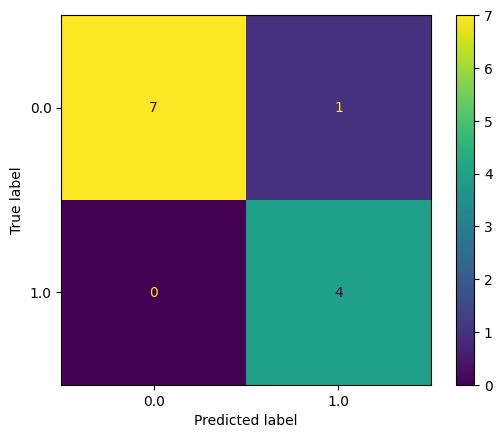

In [ ]:
#Evaluando casos mediante todos los clasificadores
from sklearn.neighbors import KNeighborsClassifier
Modelo_0 = KNeighborsClassifier(3)
Modelo_0.fit(X_train_normalized, Y_train)
Y_pred_0 =Modelo_0.predict (X_test_normalized)
print('Entrenamiento del modelo finalizado')
print(" ")

from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred_0))
print("Precision KNN",PR(Y_test, Y_pred_0, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred_0, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred_0, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred_0)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred_0, labels = Modelo_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels  =Modelo_0.classes_)
disp.plot()